In [4]:
import glob
import os
import time
from scipy.io import loadmat
import cobra
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df_normal1 = pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/DataFrames Flujos Prueba/df_normal1.txt', sep='\t')
df_normal2 = pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/DataFrames Flujos Prueba/df_normal2.txt', sep='\t')
df_normal3 = pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/DataFrames Flujos Prueba/df_normal3.txt', sep='\t')
df_cancer1 = pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/DataFrames Flujos Prueba/df_cancer1.txt', sep='\t')
df_cancer2 = pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/DataFrames Flujos Prueba/df_cancer2.txt', sep='\t')
df_cancer3 = pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/DataFrames Flujos Prueba/df_cancer3.txt', sep='\t')

In [6]:
df_cancer3

,Reacciones,FlujosC3
0,10FTHF7GLUtl,0.0
1,10FTHF7GLUtm,0.0
2,10FTHFtl,0.0
3,10FTHFtm,0.0
4,11DOCRTSLtm,0.0
...,...,...
5646,DM_4glu56dihdind[c],0.0
5647,DM_kynate[c],0.0
5648,DM_btn[n],0.0
5649,Htmi,0.0


In [7]:
reactions_normal1 = set(df_normal1['Reacciones'])
reactions_normal2 = set(df_normal2['Reacciones'])
reactions_normal3 = set(df_normal3['Reacciones'])
reactions_cancer1 = set(df_cancer1['Reacciones'])
reactions_cancer2 = set(df_cancer2['Reacciones'])
reactions_cancer3 = set(df_cancer3['Reacciones'])

reacciones_a_agregar_normal1 = (
    reactions_normal2 | reactions_normal3 |
    reactions_cancer1 | reactions_cancer2 | reactions_cancer3
) - reactions_normal1
reacciones_a_agregar_normal1

añadir_normal1=pd.DataFrame({'Reacciones':list(reacciones_a_agregar_normal1), 'FlujosN1': [0]*len(reacciones_a_agregar_normal1)})
df_normal1 =pd.concat([df_normal1,añadir_normal1])


reacciones_a_agregar_normal2 = (
    reactions_normal1 | reactions_normal3 |
    reactions_cancer1 | reactions_cancer2 | reactions_cancer3
) - reactions_normal2
reacciones_a_agregar_normal2

añadir_normal2=pd.DataFrame({'Reacciones':list(reacciones_a_agregar_normal2), 'FlujosN2': [0]*len(reacciones_a_agregar_normal2)})
df_normal2 = pd.concat([df_normal2, añadir_normal2])


reacciones_a_agregar_normal3 = (
    reactions_normal1 | reactions_normal2 |
    reactions_cancer1 | reactions_cancer2 | reactions_cancer3
) - reactions_normal3
reacciones_a_agregar_normal3

añadir_normal3=pd.DataFrame({'Reacciones':list(reacciones_a_agregar_normal3), 'FlujosN3': [0]*len(reacciones_a_agregar_normal3)})
df_normal3 = pd.concat([df_normal3, añadir_normal3])


reacciones_a_agregar_cancer1 = (
    reactions_normal1 | reactions_normal2 |
    reactions_normal3 | reactions_cancer2 | reactions_cancer3
) - reactions_cancer1
reacciones_a_agregar_cancer1

añadir_cancer1=pd.DataFrame({'Reacciones':list(reacciones_a_agregar_cancer1), 'FlujosC1': [0]*len(reacciones_a_agregar_cancer1)})
df_cancer1 = pd.concat([df_cancer1, añadir_cancer1])


reacciones_a_agregar_cancer2 = (
    reactions_normal1 | reactions_normal2 |
    reactions_normal3 | reactions_cancer1 | reactions_cancer3
) - reactions_cancer2
reacciones_a_agregar_cancer2

añadir_cancer2=pd.DataFrame({'Reacciones':list(reacciones_a_agregar_cancer2), 'FlujosC2': [0]*len(reacciones_a_agregar_cancer2)})
añadir_cancer2

df_cancer2 = pd.concat([df_cancer2, añadir_cancer2])


reacciones_a_agregar_cancer3 = (
    reactions_normal1 | reactions_normal2 |
    reactions_normal3 | reactions_cancer1 | reactions_cancer2
) - reactions_cancer3
reacciones_a_agregar_cancer3

añadir_cancer3=pd.DataFrame({'Reacciones':list(reacciones_a_agregar_cancer3), 'FlujosC3': [0]*len(reacciones_a_agregar_cancer3)})
df_cancer3 = pd.concat([df_cancer3, añadir_cancer3])

df_normal1=df_normal1.set_index('Reacciones', drop=True)
df_normal2=df_normal2.set_index('Reacciones', drop=True)
df_normal3=df_normal3.set_index('Reacciones', drop=True)
df_cancer1=df_cancer1.set_index('Reacciones', drop=True)
df_cancer2=df_cancer2.set_index('Reacciones', drop=True)
df_cancer3=df_cancer3.set_index('Reacciones', drop=True)

print(df_cancer3)

              FlujosC3
Reacciones            
10FTHF7GLUtl       0.0
10FTHF7GLUtm       0.0
10FTHFtl           0.0
10FTHFtm           0.0
11DOCRTSLtm        0.0
...                ...
r1990              0.0
MLTHFtm            0.0
FDPte              0.0
EX_malt[e]         0.0
r1852              0.0

[6597 rows x 1 columns]


In [7]:
n1n2 = pd.merge(df_normal1, df_normal2, left_index=True, right_index=True)
n1n2n3 = pd.merge(n1n2, df_normal3, left_index=True, right_index=True)
nc1 = pd.merge(n1n2n3, df_cancer1, left_index=True, right_index=True)
nc1c2 = pd.merge(nc1, df_cancer2, left_index=True, right_index=True)
df_flujos = pd.merge(nc1c2, df_cancer3, left_index=True, right_index=True)
df_flujos


,FlujosN1,FlujosN2,FlujosN3,FlujosC1,FlujosC2,FlujosC3
Reacciones,,,,,,
10FTHF7GLUtl,0.0,0.0,0.0,0.0,0.0,0.0
10FTHF7GLUtm,0.0,0.0,0.0,0.0,0.0,0.0
10FTHFtl,0.0,0.0,0.0,0.0,0.0,0.0
11DOCRTSLtm,0.0,0.0,0.0,0.0,0.0,0.0
11DOCRTSLtr,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
r1886,0.0,0.0,0.0,0.0,0.0,0.0
NCAMUP,0.0,0.0,0.0,0.0,0.0,0.0
r1536,0.0,0.0,0.0,0.0,0.0,0.0


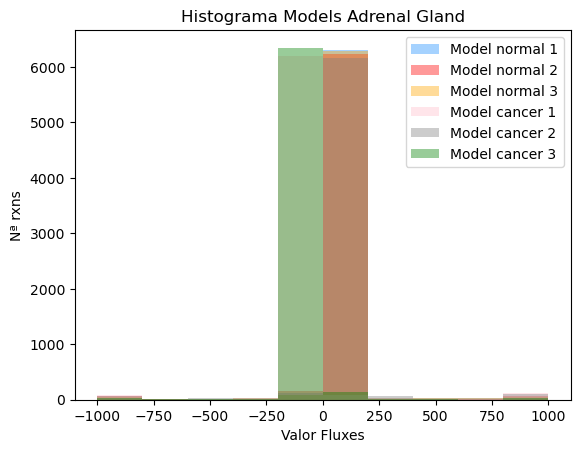

In [8]:
plt.hist(df_flujos['FlujosN1'], color='dodgerblue', alpha=0.4, label= 'Model normal 1')
plt.hist(df_flujos['FlujosN2'], color='red', alpha=0.4, label='Model normal 2')
plt.hist(df_flujos['FlujosN3'], color='orange', alpha=0.4, label= 'Model normal 3')
plt.hist(df_flujos['FlujosC1'], color='pink', alpha=0.4, label= 'Model cancer 1')
plt.hist(df_flujos['FlujosC2'], color='gray', alpha=0.4, label= 'Model cancer 2')
plt.hist(df_flujos['FlujosC3'], color='green', alpha=0.4, label= 'Model cancer 3')

plt.title('Histograma Models Adrenal Gland')
plt.xlabel('Valor Fluxes')
plt.ylabel('Nª rxns')
plt.legend(loc='upper right')
plt.grid(False)

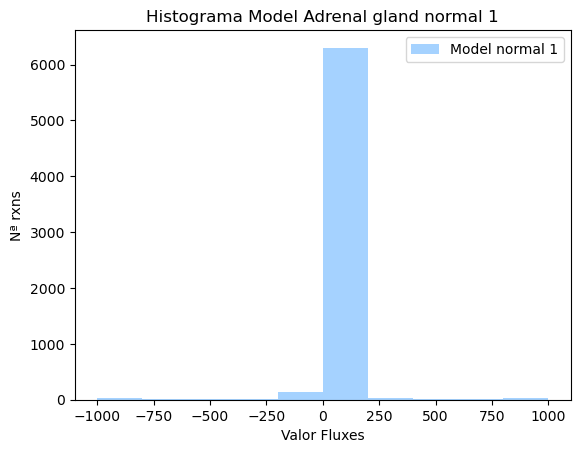

In [9]:
plt.hist(df_flujos['FlujosN1'], color='dodgerblue', alpha=0.4, label= 'Model normal 1')
plt.title('Histograma Model Adrenal gland normal 1')
plt.xlabel('Valor Fluxes')
plt.ylabel('Nª rxns')
plt.legend(loc='upper right')
plt.grid(False)

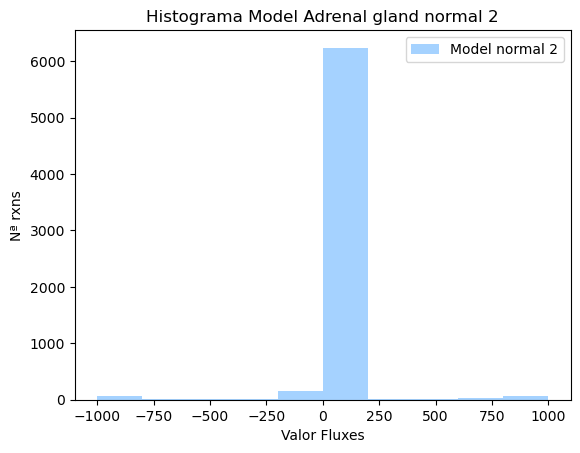

In [10]:
plt.hist(df_flujos['FlujosN2'], color='dodgerblue', alpha=0.4, label= 'Model normal 2')
plt.title('Histograma Model Adrenal gland normal 2')
plt.xlabel('Valor Fluxes')
plt.ylabel('Nª rxns')
plt.legend(loc='upper right')
plt.grid(False)

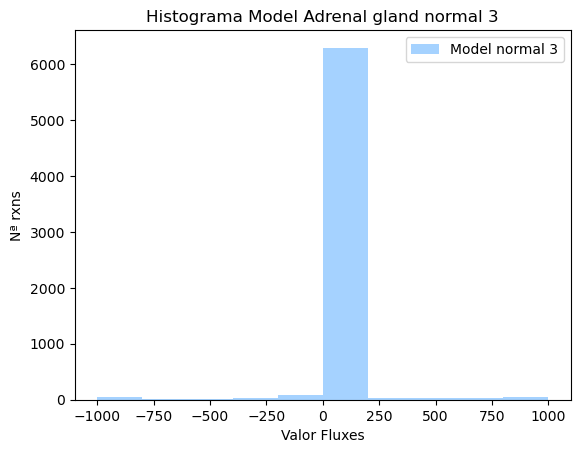

In [11]:
plt.hist(df_flujos['FlujosN3'], color='dodgerblue', alpha=0.4, label= 'Model normal 3')
plt.title('Histograma Model Adrenal gland normal 3')
plt.xlabel('Valor Fluxes')
plt.ylabel('Nª rxns')
plt.legend(loc='upper right')
plt.grid(False)

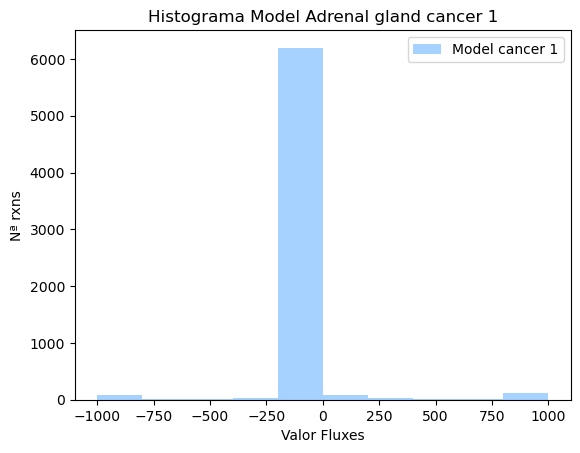

In [12]:
plt.hist(df_flujos['FlujosC1'], color='dodgerblue', alpha=0.4, label= 'Model cancer 1')
plt.title('Histograma Model Adrenal gland cancer 1')
plt.xlabel('Valor Fluxes')
plt.ylabel('Nª rxns')
plt.legend(loc='upper right')
plt.grid(False)

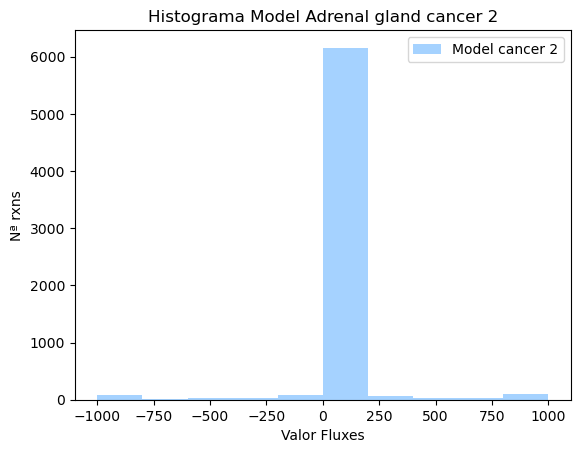

In [13]:
plt.hist(df_flujos['FlujosC2'], color='dodgerblue', alpha=0.4, label= 'Model cancer 2')
plt.title('Histograma Model Adrenal gland cancer 2')
plt.xlabel('Valor Fluxes')
plt.ylabel('Nª rxns')
plt.legend(loc='upper right')
plt.grid(False)

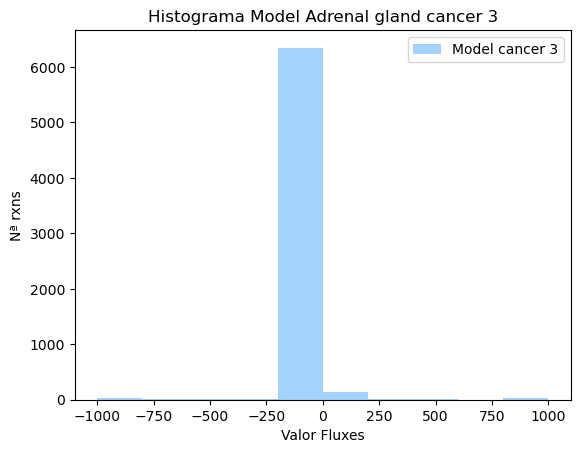

In [14]:
plt.hist(df_flujos['FlujosC3'], color='dodgerblue', alpha=0.4, label= 'Model cancer 3')
plt.title('Histograma Model Adrenal gland cancer 3')
plt.xlabel('Valor Fluxes')
plt.ylabel('Nª rxns')
plt.legend(loc='upper right')
plt.grid(False)

In [15]:
def flux_transformer(v):

    '''
    This function transforms fluxes into log2 scale with three additions:
    - zero values are kept.
    - values between 0 and 2 are adjusted to fit below one.
    - negative fluxes are considered. 
    '''

    def adjusted(v):
        new = (np.log2(v + 0.125) + 3) / 4
        return np.min([new, 1])

    if v == 0:
        vprime = 0
    elif v > 0:
        if v < 2:
            vprime = adjusted(v)
        else:
            vprime = np.log2(v)
    elif v < 0:
        v = np.abs(v)
        if v < 2:
            vprime = -adjusted(v)
        else:
            vprime = -np.log2(v)
    else:
        raise ValueError('found value not considered')

    return vprime

(array([ 124.,   33.,   14.,   14.,   39., 6111.,   22.,   17.,   48.,
         175.]),
 array([-9.96578428, -7.97262743, -5.97947057, -3.98631371, -1.99315686,
         0.        ,  1.99315686,  3.98631371,  5.97947057,  7.97262743,
         9.96578428]),
 <BarContainer object of 10 artists>)

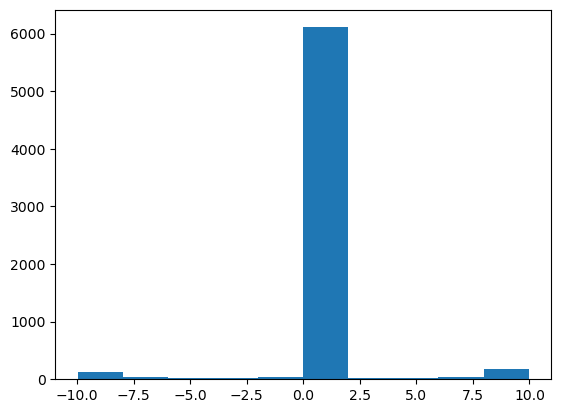

In [16]:
#COMPROBAR DISTRIBUCIÓN CON DADAS SIN TRANSFORMAR:
t_df_cancer1=df_flujos['FlujosC1'].apply(flux_transformer)
plt.hist(t_df_cancer1)

In [17]:
    t_df_flujos= df_flujos.applymap(flux_transformer)
    t_df_flujos

,FlujosN1,FlujosN2,FlujosN3,FlujosC1,FlujosC2,FlujosC3
Reacciones,,,,,,
10FTHF7GLUtl,0.0,0.0,0.0,0.0,0.0,0.0
10FTHF7GLUtm,0.0,0.0,0.0,0.0,0.0,0.0
10FTHFtl,0.0,0.0,0.0,0.0,0.0,0.0
11DOCRTSLtm,0.0,0.0,0.0,0.0,0.0,0.0
11DOCRTSLtr,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
r1886,0.0,0.0,0.0,0.0,0.0,0.0
NCAMUP,0.0,0.0,0.0,0.0,0.0,0.0
r1536,0.0,0.0,0.0,0.0,0.0,0.0


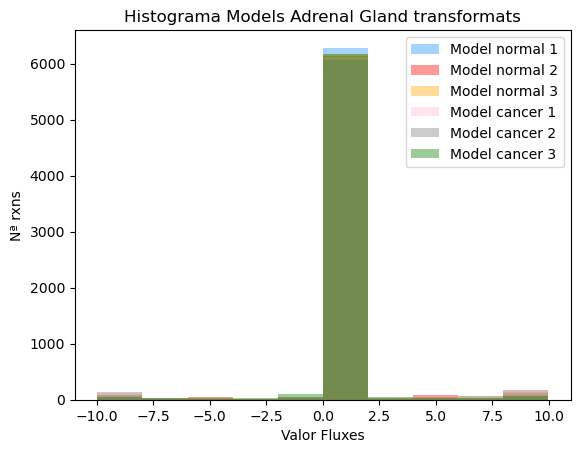

In [18]:
plt.hist(t_df_flujos['FlujosN1'], color='dodgerblue', alpha=0.4, label= 'Model normal 1')
plt.hist(t_df_flujos['FlujosN2'], color='red', alpha=0.4, label='Model normal 2')
plt.hist(t_df_flujos['FlujosN3'], color='orange', alpha=0.4, label= 'Model normal 3')
plt.hist(t_df_flujos['FlujosC1'], color='pink', alpha=0.4, label= 'Model cancer 1')
plt.hist(t_df_flujos['FlujosC2'], color='gray', alpha=0.4, label= 'Model cancer 2')
plt.hist(t_df_flujos['FlujosC3'], color='green', alpha=0.4, label= 'Model cancer 3')

plt.title('Histograma Models Adrenal Gland transformats')
plt.xlabel('Valor Fluxes')
plt.ylabel('Nª rxns')
plt.legend(loc='upper right')
plt.grid(False)

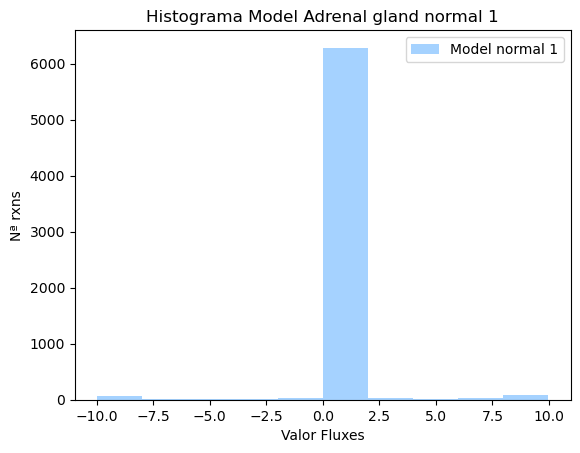

In [19]:
plt.hist(t_df_flujos['FlujosN1'], color='dodgerblue', alpha=0.4, label= 'Model normal 1')
plt.title('Histograma Model Adrenal gland normal 1')
plt.xlabel('Valor Fluxes')
plt.ylabel('Nª rxns')
plt.legend(loc='upper right')
plt.grid(False)

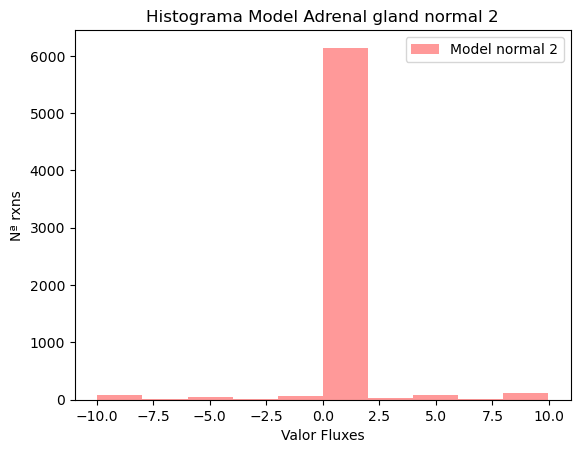

In [20]:
plt.hist(t_df_flujos['FlujosN2'], color='red', alpha=0.4, label= 'Model normal 2')
plt.title('Histograma Model Adrenal gland normal 2')
plt.xlabel('Valor Fluxes')
plt.ylabel('Nª rxns')
plt.legend(loc='upper right')
plt.grid(False)

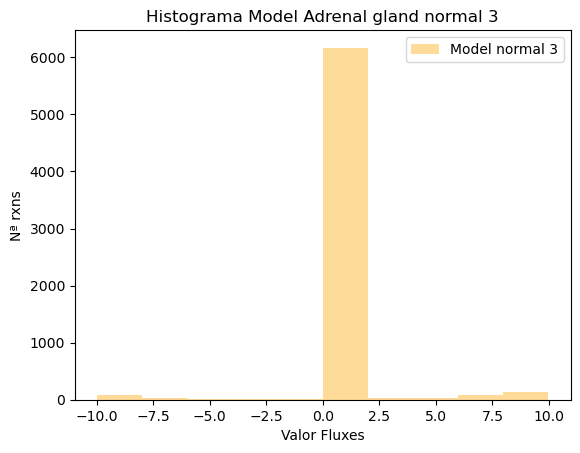

In [21]:
plt.hist(t_df_flujos['FlujosN3'], color='orange', alpha=0.4, label= 'Model normal 3')
plt.title('Histograma Model Adrenal gland normal 3')
plt.xlabel('Valor Fluxes')
plt.ylabel('Nª rxns')
plt.legend(loc='upper right')
plt.grid(False)

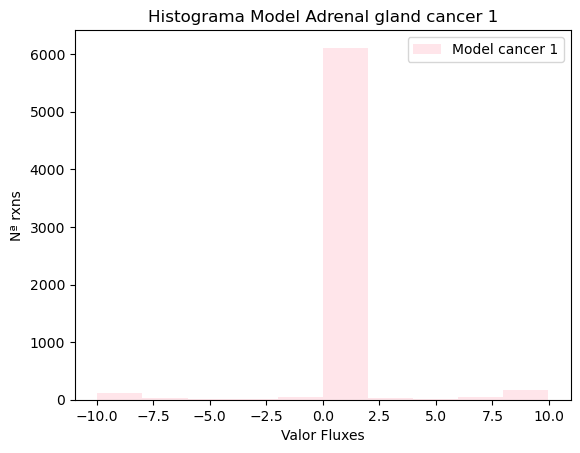

In [22]:
plt.hist(t_df_flujos['FlujosC1'], color='pink', alpha=0.4, label= 'Model cancer 1')
plt.title('Histograma Model Adrenal gland cancer 1')
plt.xlabel('Valor Fluxes')
plt.ylabel('Nª rxns')
plt.legend(loc='upper right')
plt.grid(False)

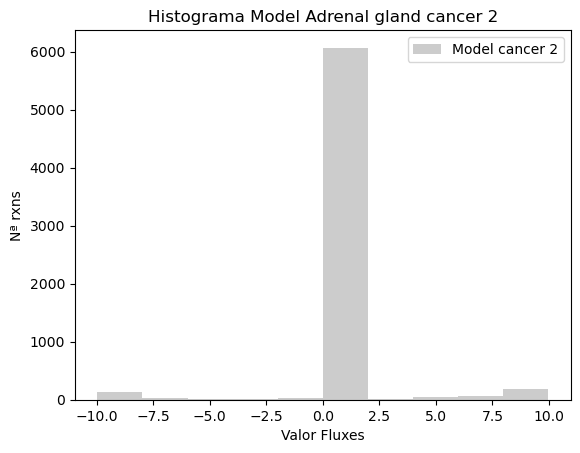

In [23]:
plt.hist(t_df_flujos['FlujosC2'], color='grey', alpha=0.4, label= 'Model cancer 2')
plt.title('Histograma Model Adrenal gland cancer 2')
plt.xlabel('Valor Fluxes')
plt.ylabel('Nª rxns')
plt.legend(loc='upper right')
plt.grid(False)

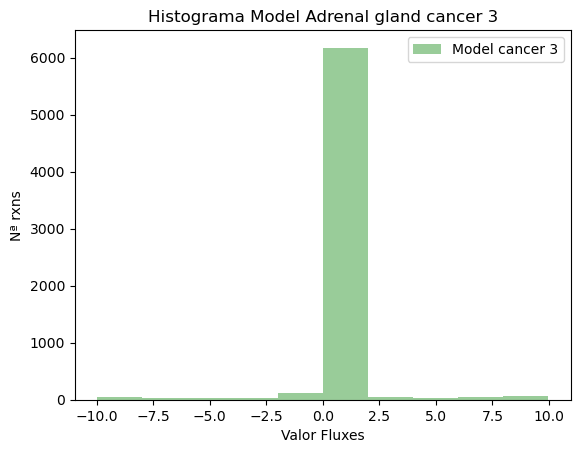

In [24]:
plt.hist(t_df_flujos['FlujosC3'], color='green', alpha=0.4, label= 'Model cancer 3')
plt.title('Histograma Model Adrenal gland cancer 3')
plt.xlabel('Valor Fluxes')
plt.ylabel('Nª rxns')
plt.legend(loc='upper right')
plt.grid(False)